<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 4</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Derivada Numérica: Forward y Backward Difference
    </p>
</div>

### **Derivada Numérica**

La derivada numérica es un método para aproximar la derivada de una función a partir de valores discretos. Es particularmente útil cuando no se dispone de una expresión analítica de la función, y solo se conocen sus valores en puntos específicos del dominio.


**Derivada Analítica:**

Formalmente, la derivada de una función $f(x)$ se define como:

$$
f'(x) = \frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$

Esta expresión representa el límite del cociente de diferencias a medida que $h$ tiende a cero.

Geométricamente, la derivada en un punto $x$ corresponde a la pendiente de la recta tangente a la curva de la función en dicho punto.


**Derivada Numérica:**

En la práctica computacional, no es posible hacer que $h$ tienda a cero debido a las limitaciones del cálculo numérico, como el redondeo y la precisión finita de las representaciones en punto flotante. Por ello, se utiliza un valor pequeño pero finito de $h$ , que llamaremos $\color{blue}{\text{tamaño de paso}}$ , para aproximar la derivada mediante fórmulas de diferencias finitas.

Algunas de las aproximaciones más comunes son las siguientes:

<div style="text-align:center;">
    <img src="derivadas.png" alt="forward_diff" style="width:50%;">
</div>

Estas fórmulas proporcionan estimaciones de la derivada en función de los valores de la función en puntos cercanos a $x$.

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1:** La derivada $\color{red}{\text{analítica}}$ de $f(x) = x^2$ es $f'(x) = 2x$. ¿Cuál es su derivada numérica usando el método **forward difference** (o diferencia progresiva), con un tamaño de paso $h=0.5$? Calcule la derivada en el dominio $x \in [0,10]$

</div>

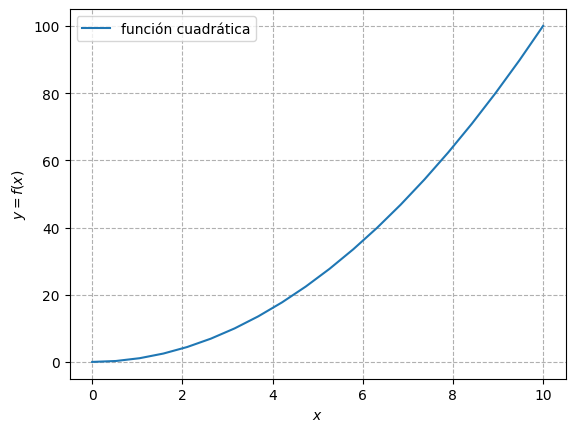

In [38]:
# importamos las librerías
import numpy as np
import matplotlib.pyplot as plt

# definimos el dominio
x = np.linspace(start=0, stop=10, num=20)

# definimos la función cuadrática
def f(x):
    return x**2

# graficamos
plt.plot(x, f(x), label="función cuadrática");
plt.xlabel(r"$x$");
plt.ylabel(r"$y=f(x)$");
plt.grid(ls="--");
plt.legend();

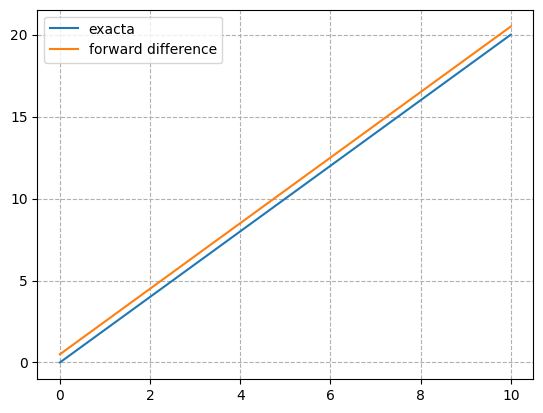

In [39]:
def forward_difference(x, f, h=0.5):
    """defina la función forward difference"""
    return (f(x+h) - f(x)) / h


# grafique

df = forward_difference(x, f, h=0.5)

plt.plot(x, 2*x, label="exacta")
plt.grid(ls="--")

plt.plot(x, df, label="forward difference")

plt.legend()


In [40]:
df - 2*x

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 2:** Calcule la derivada de $f(x)=x^2$ utilizando el método **backward difference**, grafique la derivada analítica y ambas derivadas numéricas, para el paso $h=0.5$.

</div>

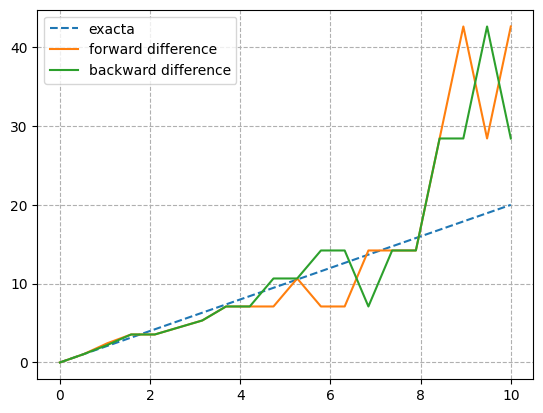

In [41]:
def backward_difference(x, f, h):
    """ codigo aqui"""
    return (f(x) - f(x-h))/h


plt.plot(x, 2*x, label="exacta", ls="--")
plt.grid(ls="--")


h=1e-15
df_back = backward_difference(x, f, h=h)
df = forward_difference(x, f, h=h)

plt.plot(x, df, label="forward difference")
plt.plot(x, df_back, label="backward difference")

plt.legend()


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">


**Ejercicio 3:** Calcule la derivada de $ f(t) = \sin(\omega t) $, para $\omega=0.4$, en el domino $t=[0,10]$. Considere tamaño de paso $h=0.5$. Además, pruebe con un $h$ muy pequeño (ej: `h=1e-15`)

</div>

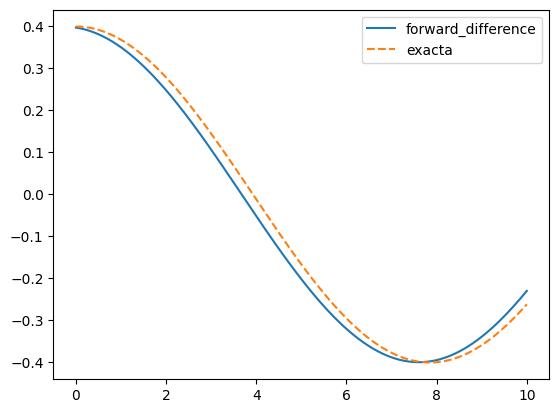

In [42]:
## su código acá

t = np.linspace(start=0, num=200, stop=10)

w=0.4
def sin_wt(t):
    w=0.4
    return np.sin(w*t)

df = forward_difference(x=t, f=sin_wt, h=0.5)

plt.plot(t, df, label="forward_difference")
plt.plot(t, w*np.cos(w*t), label="exacta", ls="--")

plt.legend()


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 4:** Calcule la derivada de $ f(t) = sin(\omega t) $, para $\omega=0.4, 0.8, 2, 4$, en el dominio $t=[0, 10]$, considerando $h=0.5$. ¿Qué ocurre con la precisión de la derivada numérica cuando $\omega$ es más grande?

</div>

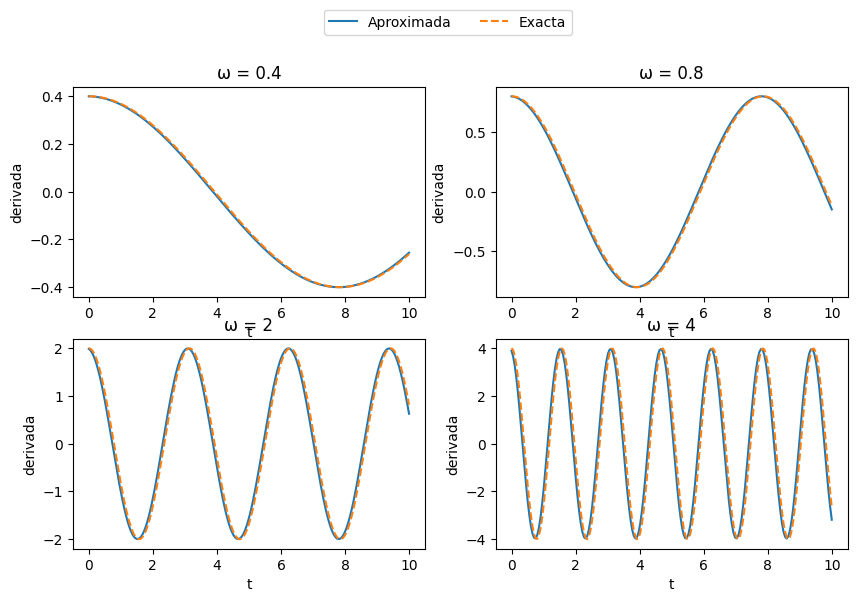

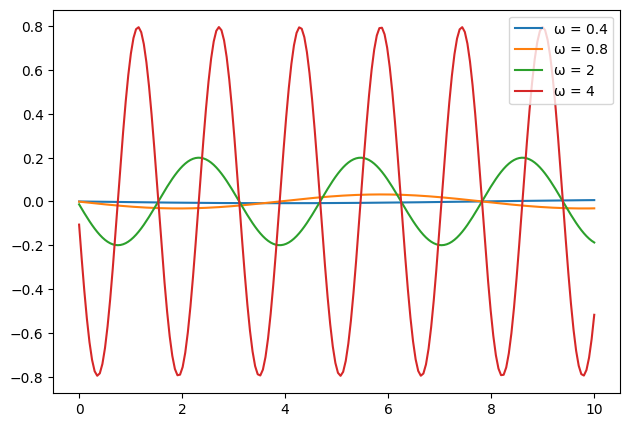

In [43]:
omegas = [0.4, 0.8, 2, 4]

# Crear subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs = axs.flatten()

_, ax = plt.subplots()

# Para graficar solo una vez las curvas de la leyenda general
for i, omega in enumerate(omegas):
    def sin_wt(t): return np.sin(omega * t)

    df = forward_difference(t, sin_wt, h=0.1)

    axs[i].plot(t, df, label="Aproximada")
    axs[i].plot(t, omega * np.cos(omega * t), ls="--", label="Exacta")
    axs[i].set_title(f"ω = {omega}")
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("derivada")

    diff = df - omega * np.cos(omega * t)

    ax.plot(t, diff, label=f"ω = {omega}")

ax.legend()

# Crear leyenda general
# Usamos handles y labels del primer subplot, porque todos comparten los mismos
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Dejar espacio para la leyenda general
plt.show()



<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 5**: Calcule la derivada de la función $f(x)=\sqrt{x+\ln(x)}$ en $x=1$, es decir, $f'(1)$. Utilice **forward difference** y compare su resultado con el valor real (derivada analítica). Realice este cálculo para $h=10^{-16}, 10^{-15}, 10^{-14}, 10^{-13}, ...,10^2, 10^1, 10^0$. Grafique el error relativo $\varepsilon$ vs $h$, definido como:

$$ \varepsilon = \left | \frac{f'_{real}(1) - f'_{num}(1)}{f'_{real}(1)}  \right| $$

¿Para qué valor de $h$ el error es mínimo?

</div>

In [54]:
np.logspace(start=-16, stop=0, num=17, base=10)

array([1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09,
       1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00])

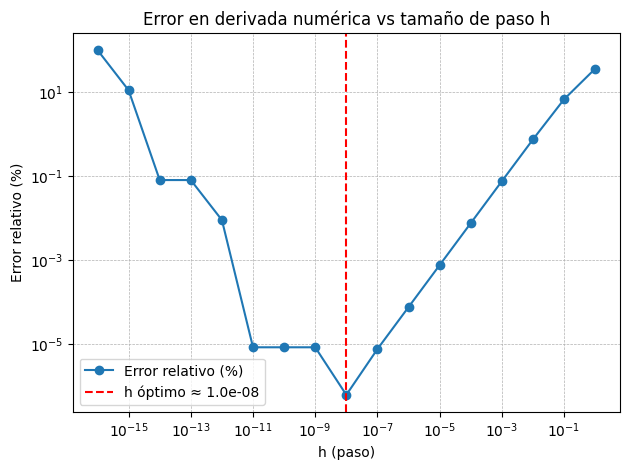

In [55]:
def f(x):
    return np.sqrt(x + np.log(x))

def f_prime(x):
    return (1 + 1/x) / (2 * np.sqrt(x + np.log(x)))

x = 1
f_prime_exacta = f_prime(x)

H = np.logspace(start=-16, stop=0, num=17, base=10)
Error = np.zeros_like(H)

for i, h in enumerate(H):
    error = np.abs((f_prime_exacta - forward_difference(x, f, h))/f_prime_exacta) * 100
    Error[i] = error

# Índice del error mínimo
min_idx = np.argmin(Error)

# Gráfica
plt.figure()
plt.loglog(H, Error, marker='o', label='Error relativo (%)')
plt.axvline(H[min_idx], color='r', linestyle='--', label=f'h óptimo ≈ {H[min_idx]:.1e}')
plt.xlabel('h (paso)')
plt.ylabel('Error relativo (%)')
plt.title('Error en derivada numérica vs tamaño de paso h')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

En esta sesión:

1. Definimos las derivadas numéricas forward y backward difference, que permiten aproximar la derivada de una función en un punto utilizando diferencias finitas.

2. Estudiamos cómo el tamaño del paso $h$ influye en la precisión de la derivada:

    - Cuando $h$ es demasiado grande, se incurre en un error de aproximación porque la fórmula de diferencia finita deja de ser una buena representación de la derivada.

    - Cuando $h$ es demasiado pequeño, se introduce un error de redondeo debido a las limitaciones de precisión numérica en los cálculos con punto flotante.

3. Como resultado, no siempre un $h$ más pequeño mejora la precisión. Existe un valor óptimo de $h$ que minimiza el error total, y este valor puede variar según la función y el punto donde se evalúa la derivada.

**Próxima clase:** Central Difference, teoría de errores y segunda derivada.
</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>